TREE
+-- [SPLIT: x4 = 3 True]
|	+-- [SPLIT: x5 = 1 True]
|	|	+-- [SPLIT: x3 = 1 True]
|	|	|	+-- [LABEL = 0]
|	|	+-- [SPLIT: x3 = 1 False]
|	|	|	+-- [LABEL = 0]
|	+-- [SPLIT: x5 = 1 False]
|	|	+-- [SPLIT: x2 = 1 True]
|	|	|	+-- [LABEL = 1]
|	|	+-- [SPLIT: x2 = 1 False]
|	|	|	+-- [LABEL = 0]
+-- [SPLIT: x4 = 3 False]
|	+-- [SPLIT: x4 = 2 True]
|	|	+-- [SPLIT: x3 = 3 True]
|	|	|	+-- [LABEL = 0]
|	|	+-- [SPLIT: x3 = 3 False]
|	|	|	+-- [LABEL = 0]
|	+-- [SPLIT: x4 = 2 False]
|	|	+-- [SPLIT: x4 = 4 True]
|	|	|	+-- [LABEL = 0]
|	|	+-- [SPLIT: x4 = 4 False]
|	|	|	+-- [LABEL = 1]
Test Error = 27.08%.
depth:1 matrix
[[ 72 144]
 [ 36 180]]
depth:3 matrix
[[198  18]
 [ 99 117]]
depth:5 matrix
[[112 104]
 [ 54 162]]


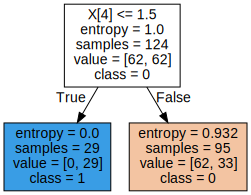

########### Decision tree through sklearn matrix ###########
depth:1 matrix
[[216   0]
 [108 108]]


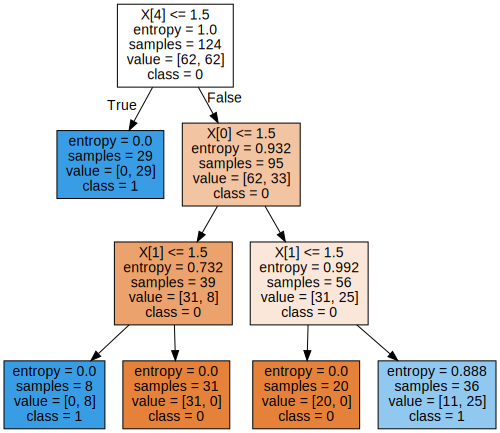

########### Decision tree through sklearn matrix ###########
depth:3 matrix
[[144  72]
 [  0 216]]


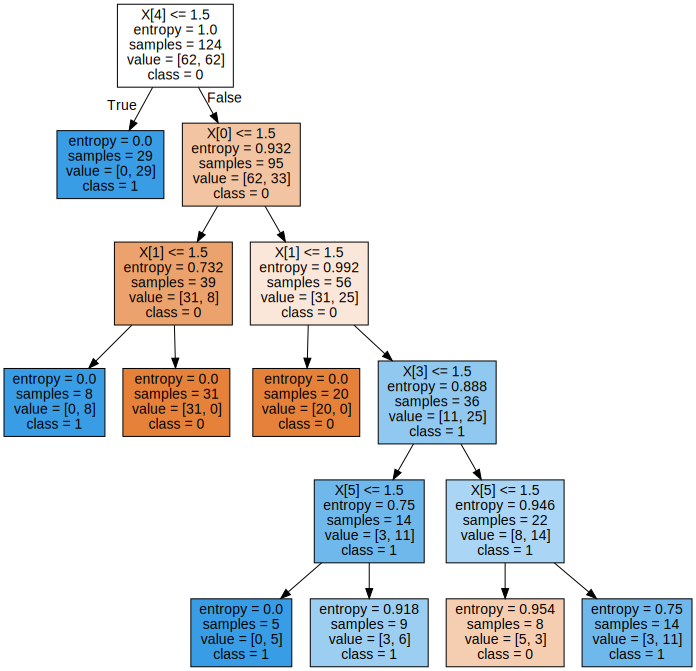

########### Decision tree through sklearn matrix ###########
depth:5 matrix
[[168  48]
 [ 24 192]]
############## Running the id3 algorithm on iris dataset to print confusion matrix###############
id3, depth:1 matrix
[[ 3 15  0]
 [ 0 12  0]
 [ 0 15  0]]
id3, depth:3 matrix
[[ 7  0 11]
 [ 0  2 10]
 [ 0  2 13]]
id3, depth:5 matrix
[[ 7  0 11]
 [ 0  2 10]
 [ 0  2 13]]
############Running the sklearn decision tree algorithm on iris dataset to print the confusion matrix ###############


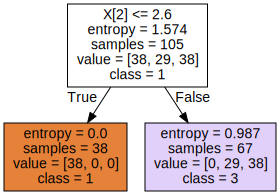

sk, depth:1 matrix
[[12  0  0]
 [ 0  0 21]
 [ 0  0 12]]


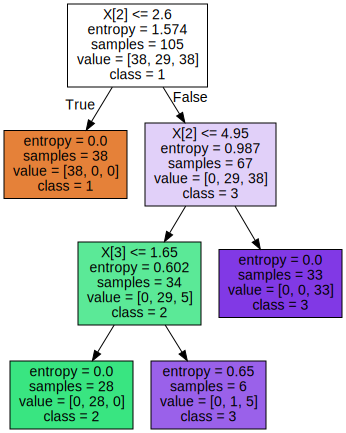

sk, depth:3 matrix
[[12  0  0]
 [ 0 19  2]
 [ 0  0 12]]


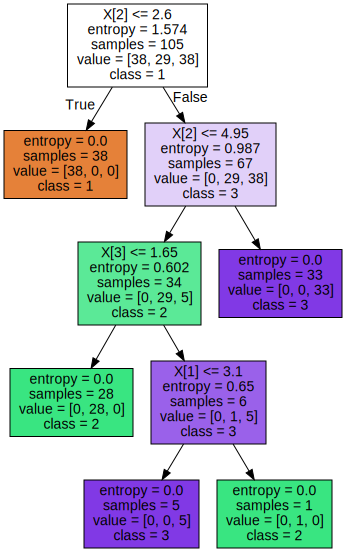

sk, depth:5 matrix
[[12  0  0]
 [ 0 19  2]
 [ 0  0 12]]


In [2]:
# decision_tree.py
# ---------
# Licensing Information:  You are free to use or extend these projects for
# personal and educational purposes provided that (1) you do not distribute
# or publish solutions, (2) you retain this notice, and (3) you provide clear
# attribution to UT Dallas, including a link to http://cs.utdallas.edu.
#
# This file is part of Homework for CS6375: Machine Learning.
# Gautam Kunapuli (gautam.kunapuli@utdallas.edu)
# Sriraam Natarajan (sriraam.natarajan@utdallas.edu),
# Anjum Chida (anjum.chida@utdallas.edu)
#
#
# INSTRUCTIONS:
# ------------
# 1. This file contains a skeleton for implementing the ID3 algorithm for
# Decision Trees. Insert your code into the various functions that have the
# comment "INSERT YOUR CODE HERE".
#
# 2. Do NOT modify the classes or functions that have the comment "DO NOT
# MODIFY THIS FUNCTION".
#
# 3. Do not modify the function headers for ANY of the functions.
#
# 4. You may add any other helper functions you feel you may need to print,
# visualize, test, or save the data and results. However, you MAY NOT utilize
# the package scikit-learn OR ANY OTHER machine learning package in THIS file.


import numpy as np
import os
import graphviz
import math
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import tree
from IPython.display import SVG, display
from graphviz import Source
from sklearn.tree import DecisionTreeClassifier


def partition(x):
    """
    Partition the column vector x into subsets indexed by its unique values (v1, ... vk)

    Returns a dictionary of the form
    { v1: indices of x == v1,
      v2: indices of x == v2,
      ...
      vk: indices of x == vk }, where [v1, ... vk] are all the unique values in the vector z.
    """

    # INSERT YOUR CODE HERE
    dict = {}
    
    for i in range(len(x)):
        if (dict.get(x[i]) == None):
            dict.update({x[i]: [i]})
        else:
            dict.get(x[i]).append(i)

    return dict

    raise Exception('Function not yet implemented!')


def entropy(y):
    """
    Compute the entropy of a vector y by considering the counts of the unique values (v1, ... vk), in z

    Returns the entropy of z: H(z) = p(z=v1) log2(p(z=v1)) + ... + p(z=vk) log2(p(z=vk))
    """

    # INSERT YOUR CODE HERE
    dict = partition(y) #dictionary containing attribute_value pairs
    
    entropy = 0
    
    for k in dict.keys():
        p = len(dict.get(k)) / len(y)
        entropy -= p * math.log2(p)
    
    return entropy
    raise Exception('Function not yet implemented!')


def mutual_information(x, y):
    """
    Compute the mutual information between a data column (x) and the labels (y). The data column is a single attribute
    over all the examples (n x 1). Mutual information is the difference between the entropy BEFORE the split set, and
    the weighted-average entropy of EACH possible split.

    Returns the mutual information: I(x, y) = H(y) - H(y | x)
    """

    # INSERT YOUR CODE HERE
    dictX = partition(x)
    MI = entropy(y)
    
    for v in dictX.values():
        subNode = []
        for i in v:
            subNode.append(y[i])
        MI -= (len(subNode) / len(y)) * entropy(subNode)
    
    return MI

    raise Exception('Function not yet implemented!')


def id3(x, y, attribute_value_pairs=None, depth=0, max_depth=5):
    """
    Implements the classical ID3 algorithm given training data (x), training labels (y) and an array of
    attribute-value pairs to consider. This is a recursive algorithm that depends on three termination conditions
        1. If the entire set of labels (y) is pure (all y = only 0 or only 1), then return that label
        2. If the set of attribute-value pairs is empty (there is nothing to split on), then return the most common
           value of y (majority label)
        3. If the max_depth is reached (pre-pruning bias), then return the most common value of y (majority label)
    Otherwise the algorithm selects the next best attribute-value pair using INFORMATION GAIN as the splitting criterion
    and partitions the data set based on the values of that attribute before the next recursive call to ID3.

    The tree we learn is a BINARY tree, which means that every node has only two branches. The splitting criterion has
    to be chosen from among all possible attribute-value pairs. That is, for a problem with two features/attributes x1
    (taking values a, b, c) and x2 (taking values d, e), the initial attribute value pair list is a list of all pairs of
    attributes with their corresponding values:
    [(x1, a),
     (x1, b),
     (x1, c),
     (x2, d),
     (x2, e)]
     If we select (x2, d) as the best attribute-value pair, then the new decision node becomes: [ (x2 == d)? ] and
     the attribute-value pair (x2, d) is removed from the list of attribute_value_pairs.

    The tree is stored as a nested dictionary, where each entry is of the form
                    (attribute_index, attribute_value, True/False): subtree
    * The (attribute_index, attribute_value) determines the splitting criterion of the current node. For example, (4, 2)
    indicates that we test if (x4 == 2) at the current node.
    * The subtree itself can be nested dictionary, or a single label (leaf node).
    * Leaf nodes are (majority) class labels

    Returns a decision tree represented as a nested dictionary, for example
    {(4, 1, False):
        {(0, 1, False):
            {(1, 1, False): 1,
             (1, 1, True): 0},
         (0, 1, True):
            {(1, 1, False): 0,
             (1, 1, True): 1}},
     (4, 1, True): 1}
    """

    # INSERT YOUR CODE HERE. NOTE: THIS IS A RECURSIVE FUNCTION.

    result_tree = {} #dictionary which contains final decision tree
    
    #construct the attribute_value_pair, (xi, value of xi)
    if attribute_value_pairs == None: 
        attribute_value_pairs = []
        for row in x:
            for i in range(len(row)):
                if (i, row[i]) not in attribute_value_pairs:
                    attribute_value_pairs.append((i, row[i]))
    
    if len(y) == 0:
        return None

    #base condition 1
    if isPureY(y):
        return y[0]
    
    #base condition 2 & 3
    if len(attribute_value_pairs) == 0 or depth == max_depth:
        return majorityLabel(y)
    
    maxMI = -1
    bestPair = () #tuple for storing bestPair
    theXi = []    #list for storing X[i] values
    
    for pair in attribute_value_pairs:
        xi = getXiColumn(x, pair[0])
        MI = mutual_information(xi, y)
        if MI > maxMI:
            maxMI = MI
            bestPair = pair
            theXi = xi
    
    attribute_value_pairs.remove(bestPair) #delete pairs after each iteration
    
    #split the dataset for next recursive
    x1, y1, x2, y2 = splitDataSet(x, y, theXi, bestPair)
    
    #construct the decision Tree and recursively calling the next level
    result_tree.update({(bestPair[0], bestPair[1], True): id3(x1, y1, attribute_value_pairs, depth + 1, max_depth)})
    result_tree.update({(bestPair[0], bestPair[1], False): id3(x2, y2, attribute_value_pairs, depth + 1, max_depth)})
    
    return result_tree

    raise Exception('Function not yet implemented!')

def isPureY(y):
    if len(y) == 0:
        return True
    
    for label in y:
        if label != y[0]:
            return False
    
    return True


# return majority label in y
def majorityLabel(y):
    if len(y) == 0:
        return None
    
    dict = partition(y)
    maxVal = 0
    majorLabel = 0
    
    for k in dict.keys():
        if len(dict.get(k)) > maxVal:
            maxVal = len(dict.get(k))
            majorLabel = k
    
    return majorLabel
    

# get the i-th column
def getXiColumn(x, col):
    columnXi = []
    for row in range(len(x)):
        columnXi.append(x[row][col])
        
    return columnXi


# split the dataset according to the nodes
def splitDataSet(x, y, theXi, bestPair):
    x1, y1, x2, y2 = x, y, x, y
    
    i, m, n = 0, 0, 0
    while i < len(x):
        if theXi[i] != bestPair[1]:
            x1 = np.delete(x1, m, 0)
            y1 = np.delete(y1, m, 0)
            m -= 1
        else:
            x2 = np.delete(x2, n, 0)
            y2 = np.delete(y2, n, 0)
            n -= 1
        i += 1
        m += 1
        n += 1
            
    return x1, y1, x2, y2

def predict_example(x, tree):
    """
    Predicts the classification label for a single example x using tree by recursively descending the tree until
    a label/leaf node is reached.

    Returns the predicted label of x according to tree
    """

    # INSERT YOUR CODE HERE. NOTE: THIS IS A RECURSIVE FUNCTION.
    if type(tree) != dict:
        return tree
    
    for k in tree.keys():
        i = k[0]
        val = k[1]
        flag = k[2]
        
        if x[i] == val and flag == True:
            nextLevel = predict_example(x, tree.get(k))
        if x[i] != val and flag == False:
            nextLevel = predict_example(x, tree.get(k))
    
    return nextLevel
    raise Exception('Function not yet implemented!')


def compute_error(y_true, y_pred):
    """
    Computes the average error between the true labels (y_true) and the predicted labels (y_pred)

    Returns the error = (1/n) * sum(y_true != y_pred)
    """

    # INSERT YOUR CODE HERE
    sum = 0
    for i in range(len(y_true)):
        if y_true[i] != y_pred[i]:
            sum += 1
    
    return sum / len(y_true)

    raise Exception('Function not yet implemented!')


def pretty_print(tree, depth=0):
    """
    Pretty prints the decision tree to the console. Use print(tree) to print the raw nested dictionary representation
    DO NOT MODIFY THIS FUNCTION!
    """
    if depth == 0:
        print('TREE')

    for index, split_criterion in enumerate(tree):
        sub_trees = tree[split_criterion]

        # Print the current node: split criterion
        print('|\t' * depth, end='')
        print('+-- [SPLIT: x{0} = {1} {2}]'.format(split_criterion[0], split_criterion[1], split_criterion[2]))

        # Print the children
        if type(sub_trees) is dict:
            pretty_print(sub_trees, depth + 1)
        else:
            print('|\t' * (depth + 1), end='')
            print('+-- [LABEL = {0}]'.format(sub_trees))


def render_dot_file(dot_string, save_file, image_format='png'):
    """
    Uses GraphViz to render a dot file. The dot file can be generated using
        * sklearn.tree.export_graphviz()' for decision trees produced by scikit-learn
        * to_graphviz() (function is in this file) for decision trees produced by  your code.
    DO NOT MODIFY THIS FUNCTION!
    """
    if type(dot_string).__name__ != 'str':
        raise TypeError('visualize() requires a string representation of a decision tree.\nUse tree.export_graphviz()'
                        'for decision trees produced by scikit-learn and to_graphviz() for decision trees produced by'
                        'your code.\n')

    # Set path to your GraphViz executable here
    os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
    graph = graphviz.Source(dot_string)
    graph.format = image_format
    graph.render(save_file, view=True)


def to_graphviz(tree, dot_string='', uid=-1, depth=0):
    """
    Converts a tree to DOT format for use with visualize/GraphViz
    DO NOT MODIFY THIS FUNCTION!
    """

    uid += 1       # Running index of node ids across recursion
    node_id = uid  # Node id of this node

    if depth == 0:
        dot_string += 'digraph TREE {\n'

    for split_criterion in tree:
        sub_trees = tree[split_criterion]
        attribute_index = split_criterion[0]
        attribute_value = split_criterion[1]
        split_decision = split_criterion[2]

        if not split_decision:
            # Alphabetically, False comes first
            dot_string += '    node{0} [label="x{1} = {2}?"];\n'.format(node_id, attribute_index, attribute_value)

        if type(sub_trees) is dict:
            if not split_decision:
                dot_string, right_child, uid = to_graphviz(sub_trees, dot_string=dot_string, uid=uid, depth=depth + 1)
                dot_string += '    node{0} -> node{1} [label="False"];\n'.format(node_id, right_child)
            else:
                dot_string, left_child, uid = to_graphviz(sub_trees, dot_string=dot_string, uid=uid, depth=depth + 1)
                dot_string += '    node{0} -> node{1} [label="True"];\n'.format(node_id, left_child)

        else:
            uid += 1
            dot_string += '    node{0} [label="y = {1}"];\n'.format(uid, sub_trees)
            if not split_decision:
                dot_string += '    node{0} -> node{1} [label="False"];\n'.format(node_id, uid)
            else:
                dot_string += '    node{0} -> node{1} [label="True"];\n'.format(node_id, uid)

    if depth == 0:
        dot_string += '}\n'
        return dot_string
    else:
        return dot_string, node_id, uid

def Learning_Curves(monk_num):
    # Load the training data
    M = np.genfromtxt('./monks_data/monks-' + monk_num + '.train', missing_values=0, skip_header=0, delimiter=',', dtype=int)
    ytrn = M[:, 0]
    Xtrn = M[:, 1:]

    # Load the test data
    M = np.genfromtxt('./monks_data/monks-' + monk_num + '.test', missing_values=0, skip_header=0, delimiter=',', dtype=int)
    ytst = M[:, 0]
    Xtst = M[:, 1:]
    
    tstErr = {}
    trnErr = {}
    
    for i in range(1, 11, 1):
        decision_tree = id3(Xtrn, ytrn, max_depth=i)
        
        # Compute the test error
        y_pred = [predict_example(x, decision_tree) for x in Xtst]
        tst_err = compute_error(ytst, y_pred)
    
        # Compute the train error
        y_trained = [predict_example(x, decision_tree) for x in Xtrn]
        trn_err = compute_error(ytrn, y_trained)
        
        tstErr.update({i: tst_err})
        trnErr.update({i: trn_err})

    
    
    plt.figure()
    plt.plot(list(tstErr.keys()), list(tstErr.values()), marker='o', linewidth=3, markersize=12)
    plt.plot(list(trnErr.keys()), list(trnErr.values()), marker='s', linewidth=3, markersize=12)
    plt.title("Monk-" + monk_num, fontsize=16)
    plt.xlabel('Depth', fontsize=16)
    plt.ylabel('test/traing error', fontsize=16)
    plt.xticks(list(tstErr.keys()), fontsize=12)
    plt.legend(['Test Error', 'Training Error'], fontsize=16)
    plt.axis([0, 11, 0, 1])
    plt.savefig("./curve_monk-"+str(monk_num)+".png")
    plt.close()


def Weak_Learners():
    # Load the training data
    M = np.genfromtxt('./monks_data/monks-1.train', missing_values=0, skip_header=0, delimiter=',', dtype=int)
    ytrn = M[:, 0]
    Xtrn = M[:, 1:]

    # Load the test data
    M = np.genfromtxt('./monks_data/monks-1.test', missing_values=0, skip_header=0, delimiter=',', dtype=int)
    ytst = M[:, 0]
    Xtst = M[:, 1:]
    
    for i in [1, 3, 5]:
        decision_tree = id3(Xtrn, ytrn, max_depth = i)
        dot_str = to_graphviz(decision_tree)
        render_dot_file(dot_str, './c' + str(i))
        # render in command line with command: dot pic.dot -T png -o pic.png
        
        # Compute the test error
        y_pred = [predict_example(x, decision_tree) for x in Xtst]
        print('depth:' + str(i) + ' matrix')
        print(confusion_matrix(ytst, y_pred))


def Scikit_Learn():
    # Load the training data
    M = np.genfromtxt('./monks_data/monks-1.train', missing_values=0, skip_header=0, delimiter=',', dtype=int)
    ytrn = M[:, 0]
    Xtrn = M[:, 1:]

    # Load the test data
    M = np.genfromtxt('./monks_data/monks-1.test', missing_values=0, skip_header=0, delimiter=',', dtype=int)
    ytst = M[:, 0]
    Xtst = M[:, 1:]
    
    for i in [1, 3, 5]:
        decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = i)
        decision_tree = decision_tree.fit(Xtrn, ytrn)
        
        #dot_str = to_graphviz(decision_tree)
        #render_dot_file(dot_str, './sklearnTree-'+str(i))
        # fig = plt.figure(figsize=(25,20))
        # _ = tree.plot_tree(decision_tree, 
        #            feature_names=str(Xtrn),  
        #            class_names=str(ytrn),
        #            filled=True)

        #graph = Source(tree.export_graphviz(decision_tree, out_file = None, class_names = ['1', '2', '3'] , filled = True))
        #display(SVG(graph.pipe(format = 'svg')))

        graph = Source(tree.export_graphviz(decision_tree, out_file = None, class_names = ['0', '1'] , filled = True))
        display(SVG(graph.pipe(format = 'svg')))
        # render in command line with command: dot pic.dot -T png -o pic.png
        
        # Compute the test error
        print("########### Decision tree through sklearn matrix ###########")
        y_pred = decision_tree.predict(Xtst)
        print('depth:' + str(i) + ' matrix')
        print(confusion_matrix(ytst, y_pred))


from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

def Iris_DataSet_id3Algorithm():


    print("############## Running the id3 algorithm on iris dataset to print confusion matrix###############")
    # Used dataset from the UCI repository, "Iris Data Set"
    #1. sepal length in cm
    #2. sepal width in cm
    #3. petal length in cm
    #4. petal width in cm
    #5. class:
        #-- 1 : Iris Setosa
        #-- 2 : Iris Versicolour
        #-- 3 : Iris Virginica
    # since it has continuous values, used a simple discretization strategy to pre-process them into binary values 
    # x <= mean : 0; x > mean : 1
    
    #Summary Statistics:
	#              Min  Max   Mean
    #sepal length: 4.3  7.9   5.84  
    #sepal width:  2.0  4.4   3.05  
    #petal length: 1.0  6.9   3.76  
    #petal width:  0.1  2.5   1.20  
    
    iris=load_iris()

    X=iris.data
    Y=iris.target
    #print(X)
    #print(Y)


    Xtrn,Xtst,ytrn,ytst=train_test_split(X,Y,test_size=0.3)

    
    for i in [1, 3, 5]:
        decision_tree = id3(Xtrn, ytrn, max_depth = i)
        dot_str = to_graphviz(decision_tree)
        render_dot_file(dot_str, './e_id3_' + str(i))
        
        # Compute the test error
        y_pred = [predict_example(x, decision_tree) for x in Xtst]
        print('id3, depth:' + str(i) + ' matrix')
        print(confusion_matrix(ytst, y_pred))



def Iris_DataSet_sk():

    print("############Running the sklearn decision tree algorithm on iris dataset to print the confusion matrix ###############")
    iris=load_iris()
    
    X=iris.data
    Y=iris.target
    #print(X)
    #print(Y)

    Xtrn,Xtst,ytrn,ytst=train_test_split(X,Y,test_size=0.3)
    
    for i in [1, 3, 5]:
        decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = i)
        decision_tree = decision_tree.fit(Xtrn, ytrn)
        
        graph = Source(tree.export_graphviz(decision_tree, out_file = None, class_names = ['1', '2', '3'] , filled = True))
        display(SVG(graph.pipe(format = 'svg')))
        
        # Compute the test error
        y_pred = decision_tree.predict(Xtst)
        print('sk, depth:' + str(i) + ' matrix')
        print(confusion_matrix(ytst, y_pred))

if __name__ == '__main__':
    # Load the training data
    M = np.genfromtxt('./monks_data/monks-1.train', missing_values=0, skip_header=0, delimiter=',', dtype=int)
    ytrn = M[:, 0]
    Xtrn = M[:, 1:]

    # Load the test data
    M = np.genfromtxt('./monks_data/monks-1.test', missing_values=0, skip_header=0, delimiter=',', dtype=int)
    ytst = M[:, 0]
    Xtst = M[:, 1:]

    # Learn a decision tree of depth 3
    decision_tree = id3(Xtrn, ytrn, max_depth=3)

    # Pretty print it to console
    pretty_print(decision_tree)

    # Visualize the tree and save it as a PNG image
    dot_str = to_graphviz(decision_tree)
    render_dot_file(dot_str, './my_learned_tree')

    # Compute the test error
    y_pred = [predict_example(x, decision_tree) for x in Xtst]
    tst_err = compute_error(ytst, y_pred)

    print('Test Error = {0:4.2f}%.'.format(tst_err * 100))

    Learning_Curves("1")
    Learning_Curves("2")
    Learning_Curves("3")

    Weak_Learners()

    Scikit_Learn()

    Iris_DataSet_id3Algorithm()

    Iris_DataSet_sk()




